In [25]:
import glob
import cv2
import numpy as np
from collections import Iterable
%matplotlib inline
from matplotlib import pyplot as plt
img = cv2.imread("./train/original/malignant/1000.jpg") 
im = cv2.imread("./train/original/malignant/1000.jpg") 
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)



    

# Hybrid Median Filter

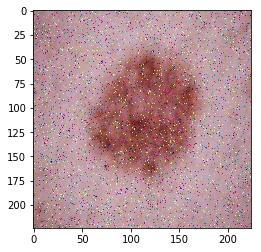

In [28]:
img_noise = cv2.imread("./train/noise/malignant/1000.jpg") 
img_noise = cv2.cvtColor(img_noise, cv2.COLOR_BGR2RGB)
plt.imshow(img_noise)

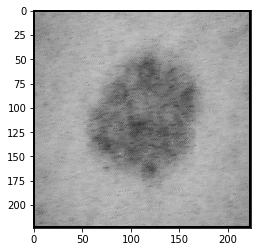

In [32]:

n=5
img = np.zeros(img_noise.shape,dtype=np.int16)    
# Derive indices for the two patterns representing X and +
indicesC = [0,4,6,8,12,16,18,20,24]
indicesP = [2,7,10,11,12,13,14,17,22]
    
v =int( (n-1) / 2)
   
   
# Process the image (ignoring the outer two layers of the image boundary
for i in range(2,img_noise.shape[0]-2):
    for j in range(2,img_noise.shape[1]-2):
            # Extract the neighbourhood area
        block = img_noise[i-v:i+v+1, j-v:j+v+1]
        
        # Reshape the neighborhood into a vector by flattening the 2D block
        wB = block.flatten()
         
            # Extract pixel values using indices
        wBc = np.take(wB,indicesC)
        wBp = np.take(wB,indicesP)
                  
            # Calculate the median values      
        wBcMed = int(np.median(wBc))
        
        wBpMed = int(np.median(wBp))
       
            # Calculate the hybrid median of the original pixel, and the two 
            # medians extracted above
        lis=[wBcMed,wBpMed]
        
       
        xmed = np.median(lis)
    
            # Assign the values               
        if (xmed > 0):
            img[i][j] = int(xmed)
        else:
            img[i][j] = im[i][j]

plt.imshow(img)

# Brightness

In [ ]:
img = cv2.imread("./train/malignant/1000.jpg") 

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)
value =30
lim = 255 - value
v[v > lim] = 255
v[v <= lim] += value
final_hsv = cv2.merge((h, s, v))
img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

plt.imshow(img)

# Median Filtering

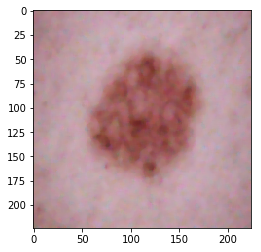

In [33]:
img_median = cv2.medianBlur(img_noise,5)
plt.imshow(img_median)

# Average-filter

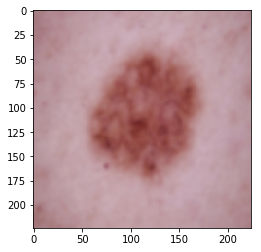

In [37]:

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(im,-1,kernel)
plt.imshow(dst);

#   Gaussian blur

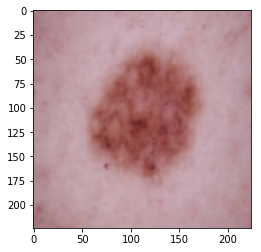

In [38]:
blur = cv2.GaussianBlur( im,(5,5),0)
plt.imshow(blur);

#   Bilateral filter

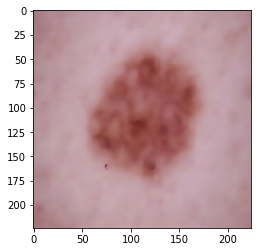

In [39]:
blurb= cv2.bilateralFilter(im,9,75,75)
plt.imshow(blurb);

#   Negative image

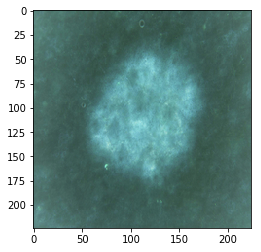

In [40]:
imagem = cv2.bitwise_not(im);
plt.imshow(imagem);

#   Laplacian

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


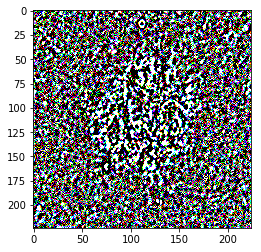

In [41]:
laplacian = cv2.Laplacian(blur,cv2.CV_64F)
plt.imshow(laplacian);

# Segmenation

In [42]:

gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

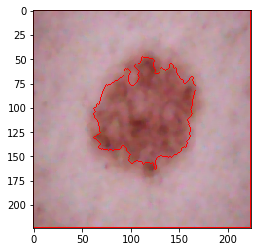

In [43]:
markers = cv2.watershed(img_median,markers)
img_median[markers == -1] = [255,0,0]
plt.imshow(img_median)

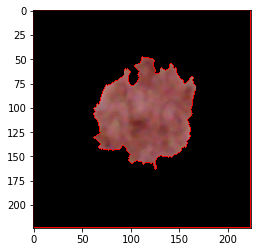

In [44]:
img_median[markers == 1] = 0
plt.imshow(img_median)